In [29]:
# Probability and math statistics
# Lesson 7. Home work https://gb.ru/study_groups/37123/homeworks/203091

# Task 1. For given matrix of the Object-Feature X and target variable value Y determine 2 features (from 4) the way
#         that the level of a linear dependency of the target variable from the features values was the maximal.
#         In other words, a linear regression model on these features should give the best result.
#         As an answer, write down the value of the coefficient of determination for the model on these features. 

import numpy as np
import itertools

X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

# Coefficient of a determination varies in [0...1] and based on R-square

def r2_value(samples: np.ndarray, y_target: np.ndarray):

    ones = np.ones((samples.shape[0], 1)) # fill b0 coeff with 1
    x2 = np.hstack((ones, samples)) # clue vectors

    XTX = x2.T.dot(x2) # XTX matrix generation

    # Model coefficients: y = b0 + b1*x1 + b2*x2
    XTX_inv = np.linalg.inv(XTX)

    b = XTX_inv.dot(x2.T).dot(y_target) # the model coefficients b0, b1, b2 

    # print(f'y = {b[0]} + {b[1]}*x1 + {b[2]}*x2') 

    z2 = x2.dot(b)

    return (np.corrcoef(y_target, z2) ** 2)[0,1]

combinations = np.array(list(itertools.combinations(range(X.shape[1]),2)))

# Find R2 for all combinations of columns
# r2_values = [r2_value(X[:, pair], y) for pair in combinations]
# max_r2 = max(r2_values)

max_r2 = 0
best_pair = [0, 0]
for pair in combinations:
    r2 = r2_value(X[:, pair], y)
    if max_r2 < r2:
        max_r2 = r2
        best_pair = pair

print(f'Max coeff = {round(max_r2, 8)} for columns {best_pair}') 

# ANSWER: 0.76342462 

Max coeff = 0.76342462 for columns [0 2]


11.294439122922636

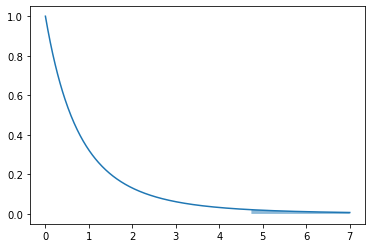

In [38]:
# Task2. Is the regression equation obtained in the previous problem significant? 
#        For your answer, write 1 if yes, and 0 otherwise. 
from scipy import stats
from matplotlib import pyplot as plt

ones = np.ones((X.shape[0], 1)) # fill b0 coeff with 1
x_norm = np.hstack((ones, X[:, best_pair])) # clue vectors

n = x_norm.shape[0]
m = x_norm.shape[1] - 1  # Since added zero factor

k1 = m
k2 = n - m - 1
k1, k2

# For significance level alpha = 0.05
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t # 5.192168

# Found a critical region is Ωα=(5.19,∞)

# Draw the plot
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

# Statistics F - is it within the critical region?
F = (max_r2 / k1) / ((1 - max_r2) / k2)
F # Value 11.294439122922636 is within the critical region

# ANSWER: 1

In [44]:
# Task3. To conduct A / B testing of the online store website, the following data was obtained: 
#          - page `A` was visited 2509 times, 77 of them ended in a purchase,
#          - page `B` was visited 1465 times, 60 of them ended in a purchase.
#        Is the conversion difference between pages `A` and `B` significant?
#        For your answer, write 1 if yes, and 0 otherwise. 

#        Prompt: implement a two-sample t-test. 
#        As samples here, you can take sets of labels for making a purchase (0 or 1) by each visitor. 

An = 2509
A_bought = 77
Bn = 1465
B_bought = 60

# Generate samples from 1 / 0 
A_values = np.ones(An)
A_values[:A_bought] = 0
np.random.shuffle(A_values)

B_values = np.ones(Bn)
B_values[:B_bought] = 0
np.random.shuffle(B_values)

print(A_values)
print(B_values)

# Find a standard deviation of the difference between the sample means of the samples A and B - sigma_delta
s1 = A_values.std(ddof=1)
s2 = B_values.std(ddof=1)
sigma_delta = np.sqrt(s1 ** 2 / An + s2 ** 2 / Bn)

# Get statistics value (Students distribution)
t = (A_values.mean() - B_values.mean()) / sigma_delta
print(f't-statistics = {t}') # 1.65

# Set the significance level alpha as 0.05
# Calculate the quantiles of Student's distribution. Calculate the number of degrees of freedom of this distribution 
alpha = 0.05

df = (s1 ** 2 / An + s2 ** 2 / Bn) ** 2 / \
    ((s1 ** 2 / An) ** 2 / (An - 1) + (s2 ** 2 / Bn) ** 2 / (Bn - 1))

# Quantiles are below
t1 = stats.t.ppf(alpha/2, df=df)
t2 = stats.t.ppf(1-alpha/2, df=df)

print(t1, t2) # -1.9608324352746576 1.9608324352746571

# Critical region is Ωα=(−∞,−1.96)∪(1.96,∞) but t-value was 1.65

# ANSWER: 0 since t (1.65) is at a critical regions and the hypothesis of equality of mathematical expectations is rejected 

[1. 1. 1. ... 1. 1. 1.]
[1. 0. 1. ... 1. 1. 1.]
t-statistics = 1.6504551408398382
-1.9608324352746576 1.9608324352746571
